In [85]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [86]:
df = pd.read_csv('HR_comma_sep.csv')
df[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [87]:
# shape:
df.shape

(14999, 10)

In [88]:
# info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [89]:
# describing stats of variables:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [90]:
# Columns:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [91]:
#df.dtypes

# ---------------------------------------------------------------------------------------------------------------

# TASK 1

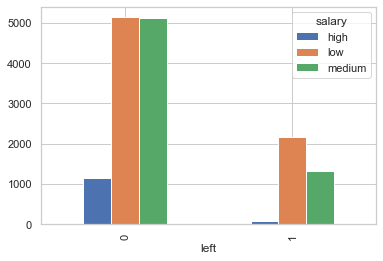

In [92]:
# Impact of salary on employee retention:
pd.crosstab(df.left,
            df.salary).plot(kind='bar')

plt.rc("font", size=10)

<AxesSubplot:xlabel='salary', ylabel='count'>

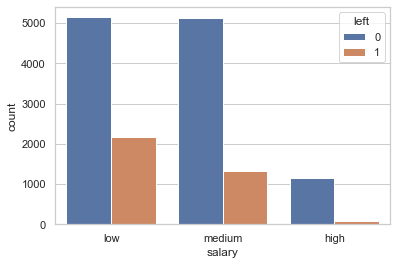

In [93]:
sns.countplot(x="salary",
              hue='left',
              data=df)

In [10]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

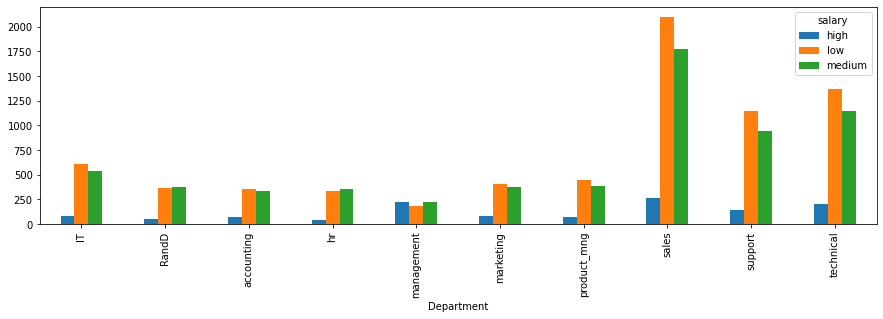

In [11]:
pd.crosstab(df.Department,
            df.salary).plot(kind='bar',
                            figsize = (15,4))


plt.rc("font", size=10,)

# ---------------------------------------------------------------------------------------------------------------

# TASK2

## Data Preprocessing

### Data quality | Missing Value Assessment

In [12]:
# check missing values in data
df[df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


* As we can observe, there are no points with missing values.

### Data quality | Removing duplicates

In [13]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


* As there are duplicates in the dataset, To ensure data quality we have to delete the duplicates.

In [14]:
#deleting duplicates
print('Size of DataFrame before drop_duplicates', df.shape)

# inplace overwrited the original dataframe
df.drop_duplicates(inplace= True)

print('Size of DataFrame after drop_duplicates', df.shape)

Size of DataFrame before drop_duplicates (14999, 10)
Size of DataFrame after drop_duplicates (11991, 10)


### Data quality | Detect correlations

In [15]:
column_correlation = df.corr()
column_correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


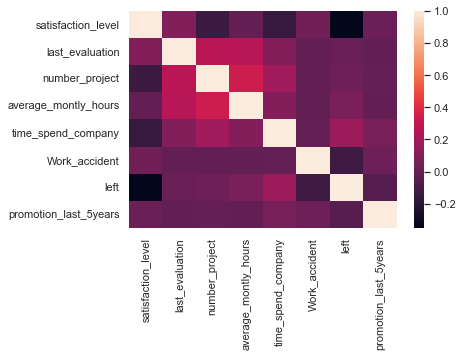

In [94]:
sns.heatmap(column_correlation);

plt.show()

#white background style for seaborn plots
sns.set(style="white")

sns.set(style="whitegrid",color_codes=True)

In [17]:
# X = df.iloc[:, [0,1,2,3,4,5,8,9]]
# Y = df.iloc[:, 6]

In [18]:
col_encoder = preprocessing.LabelEncoder()

In [19]:
col_encoder.fit(df.salary)
print(col_encoder.classes_)

['high' 'low' 'medium']


In [20]:
df.salary = col_encoder.transform(df.salary)

In [21]:
df_copy = df.copy()

In [32]:
#Encoding gender variable to numerical variable
encoder = preprocessing.LabelEncoder()

# Encoding of the gender
encoder.fit(df.Department)
print(encoder.classes_)
df.Department = encoder.transform(df.Department)

# # deleting name
# df = df.drop(columns=['Name'])
# df.head()

[0 1 2 3 4 5 6 7 8 9]


In [22]:
# c0 = df_copy[df["salary"] == 0]
# c1 = df_copy[df["salary"] == 1]
# c2 = df_copy[df["salary"] == 2]

In [23]:
# df_copy["salary_HIGH"] = c0["salary"] + 1
# df_copy["salary_AVERAGE"] = c0["salary"] + 0
# df_copy["salary_LOW"] = c0["salary"] / 2
# df_copy.replace(np.nan,0,inplace = True)

In [24]:
df_copy

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_HIGH,salary_AVERAGE,salary_LOW
0,0.38,0.53,2,157,3,0,1,0,sales,1,0.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,2,0.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,2,0.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,1,0.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,0,1.0,0.0,0.0
11996,0.74,0.95,5,266,10,0,0,1,management,0,1.0,0.0,0.0
11997,0.85,0.54,3,185,10,0,0,1,management,0,1.0,0.0,0.0
11998,0.33,0.65,3,172,10,0,0,1,marketing,0,1.0,0.0,0.0


In [25]:
col_encoder = preprocessing.LabelEncoder()

In [26]:
#col_encoder.fit(df.Department)
col_encoder.fit(df.Department)
print(col_encoder.classes_)

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


# ---------------------------------------------------------------------------------------------------------------

# TASK 3

## Logistic Regression

### Preparation of training and test dataset

In [33]:
#Creating test and training datasets
df_train, df_test = train_test_split(df,train_size = 0.7)

print('Size of training dataset: ', df_train.shape)
print('Size of test dataset: ', df_test.shape)

Size of training dataset:  (8393, 10)
Size of test dataset:  (3598, 10)


In [34]:
X_train = df_train.drop(columns='left', axis =1)
y_train = df_train['left']
X_test = df_test.drop(columns='left', axis =1)
y_test = df_test['left']
X_train.shape, y_train.shape, X_test.shape

((8393, 9), (8393,), (3598, 9))

### Training the model

In [53]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Using the trained model to predict the outcome of the X_Test dataset
y_pred = logreg.predict(X_test)

#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


84.03

In [54]:
# indicates the value of the slope of each parameter 
df = pd.DataFrame(df_train.columns.delete(0))

df.columns = ['Feature']

df["Correlation"] = pd.Series(logreg.coef_[0])

df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,number_project,0.650211
4,Work_accident,0.255875
7,Department,0.028194
8,salary,0.006337
3,time_spend_company,0.003998
2,average_montly_hours,-0.250373
6,promotion_last_5years,-0.734989
5,left,-1.328128
0,last_evaluation,-3.909684


In [55]:
#model.intercept_ indicates the intercept with the Y-axis
logreg.intercept_

array([-0.70271977])

In [56]:
# evalate the model on the test data
logreg.score(X_test, y_test)

0.8282379099499723

In [58]:
#indicating which person will survive in the dataset
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# ---------------------------------------------------------------------------------------------------------------

# TASK 4

## Model Evaluation

### Confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test,y_pred)

array([[2849,  130],
       [ 488,  131]], dtype=int64)

In [61]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [71]:
print('Accuracy  :', accuracy_score(y_test, y_pred))
print('Recall    :', recall_score(y_test, y_pred, average='weighted'))
print('F1-score  :', f1_score(y_test, y_pred, average='weighted'))
print('Precision :', precision_score(y_test, y_pred))

Accuracy  : 0.8282379099499723
Recall    : 0.8282379099499723
F1-score  : 0.7981678010003638
Precision : 0.5019157088122606


### AUC

In [72]:
from sklearn.metrics import roc_auc_score

In [74]:
roc = roc_auc_score(y_test, 
                    logreg.predict_proba(X_test)[:,1])
roc

0.8199426139139838

In [75]:
# calculate roc curve
from sklearn.metrics import roc_curve

In [77]:
fpr, tpr, thresholds = roc_curve(y_test,
                                 y_pred)

# calculate AUC

auc = roc_auc_score(y_test,
                    y_pred)

print('AUC: %.3f' % auc)

AUC: 0.584


In [78]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [81]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

In [82]:
# predict probabilities
lr_probs = logreg.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.820


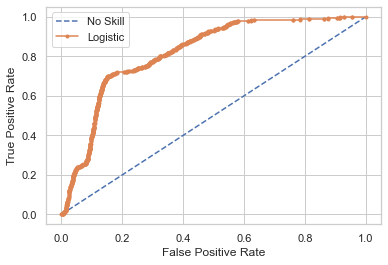

In [83]:
# keep probabilities for the positive outcome only...
lr_probs = lr_probs[:, 1]

# calculate scores...
ns_auc = roc_auc_score(y_test,
                       ns_probs)

lr_auc = roc_auc_score(y_test,
                       lr_probs)

# summarize scores...
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves...
ns_fpr, ns_tpr, _ = roc_curve(y_test,
                              ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test,
                              lr_probs)

# plot the roc curve for the model...
pyplot.plot(ns_fpr,
            ns_tpr,
            linestyle='--',
            label='No Skill')

pyplot.plot(lr_fpr,
            lr_tpr,
            marker='.',
            label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# ---------------------------------------------------------------------------------------------------------------